In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data=pd.read_csv("iris.csv")

In [49]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.Species.unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
data.Species.value_counts() 

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


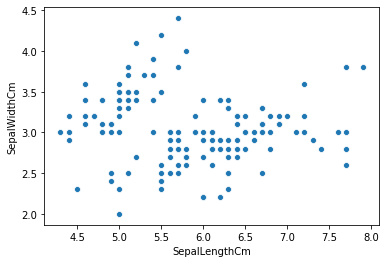

In [8]:
#sns.scatterplot(x=data.SepalLengthCm,y=data.SepalWidthCm) İki şekilde de kullanılabilir.
sns.scatterplot(data=data,x="SepalLengthCm",y="SepalWidthCm")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


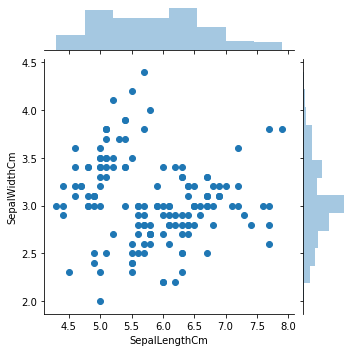

In [9]:
sns.jointplot(data=data,x="SepalLengthCm",y="SepalWidthCm",size=5)
plt.show()

In [10]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [11]:
virginica=data[data.Species=="Iris-virginica"]
versicolor=data[data.Species=="Iris-versicolor"]
setosa=data[data.Species=="Iris-setosa"]

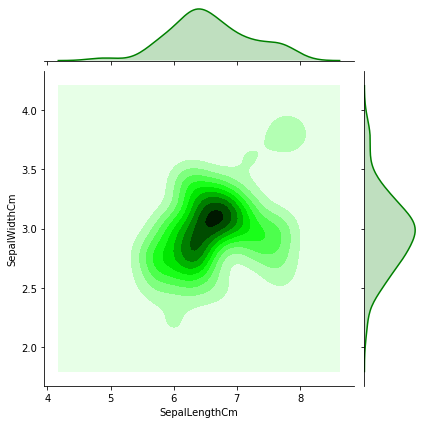

In [12]:
sns.jointplot(data=virginica,x="SepalLengthCm",y="SepalWidthCm",color="g",kind="kde")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


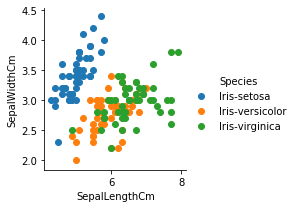

In [13]:
sns.FacetGrid(data, hue="Species", size=3).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
"""fig = setosa.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
versicolor.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
virginica.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)""" 
# Her iki şekilde de yapılabilir. 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


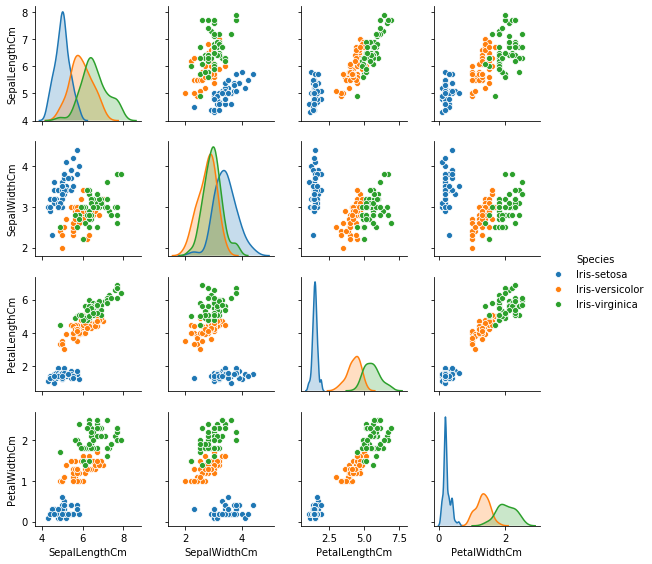

In [14]:
sns.pairplot(data.drop("Id",axis=1), hue="Species",size=2) # Görselleştirmede Id kısmını görmemek için drop edildi.
plt.show()

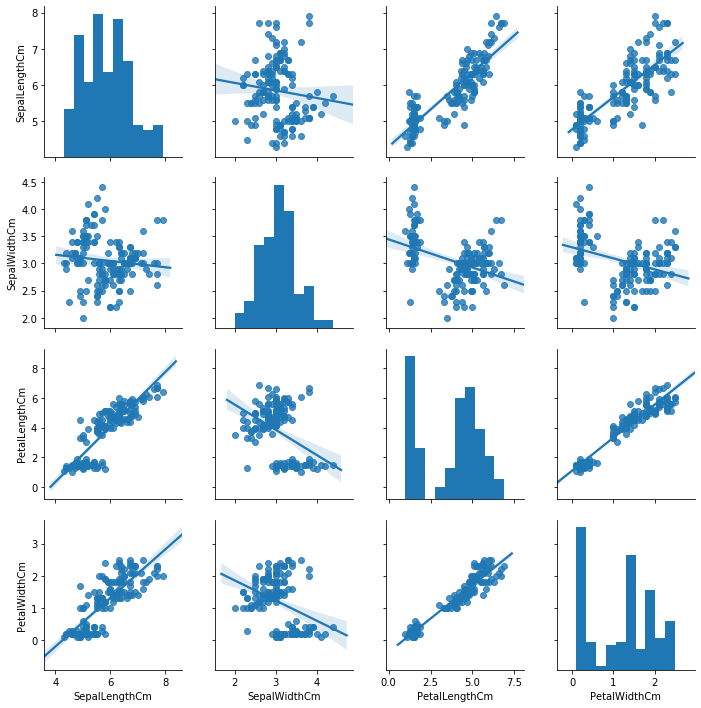

In [15]:
sns.pairplot(data.drop("Id",axis=1),kind="reg") # Görselleştirmede Id kısmını görmemek için drop edildi.
plt.show()

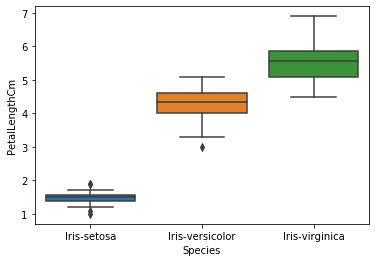

In [16]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.show()

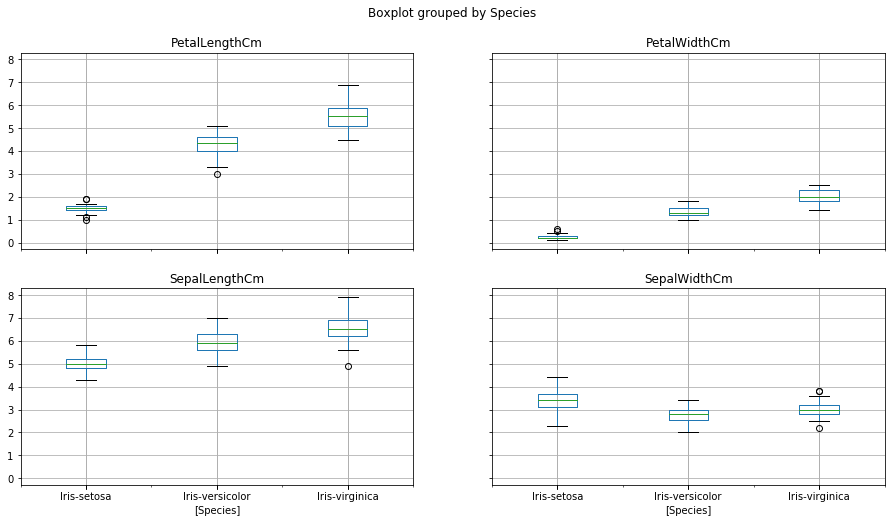

In [17]:
data.drop("Id",axis=1).boxplot(by="Species",figsize=(15,8))
plt.show()

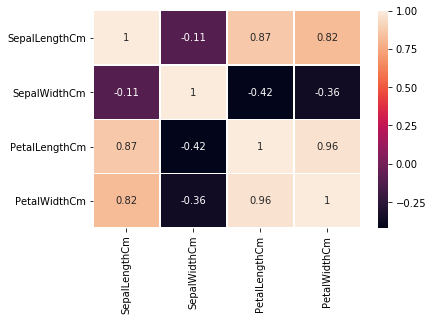

In [18]:
sns.heatmap(data.drop("Id",axis=1).corr(),annot=True, linewidths=.5)


CLUSTERING

Clustering ( Kümeleme ) bir veri setinde benzer özellikler gösteren verilerin gruplara ayrılmasına denir. Aynı küme içinde benzerlikler fazla, kümeler arası benzerlikler azdır. Unsupervised Learning ( Gözetimsiz öğrenme ) vardır yani önceden herhangi bir bilgi verilmez.

In [24]:
data_kmeans = data.iloc[:,1:-1].values  #Species kısmını almadık. 

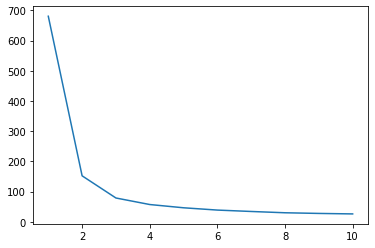

In [43]:
#K-Means Algoritması
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init="k-means++")# n_cluster=3 Ayıracağımız küme sayısıdır.
#Bu değeri rastgele vermemiz yanlış sonuca götürebilir.  init = Başlangıç noktalarının belirlenmesidir.
km.fit(data_kmeans) # ilk başta belli değerler ile kontrol etmemiz lazım en iyi çalıştığı değeri öğrenmek için.
results=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(data_kmeans)
    results.append(km.inertia_)
# Şimdi en iyi seçeneği görmek için sonucları çizdirmemiz lazım
sns.lineplot(range(1,11),results)
plt.show()

Grafiğe bakıldığında en iyi noktamız 3 ile 4 olur. Bu noktalardan birini seçip ilerlememiz lazım

In [34]:
km=KMeans(n_clusters=3,init="k-means++")
predict=km.fit_predict(data_kmeans) 

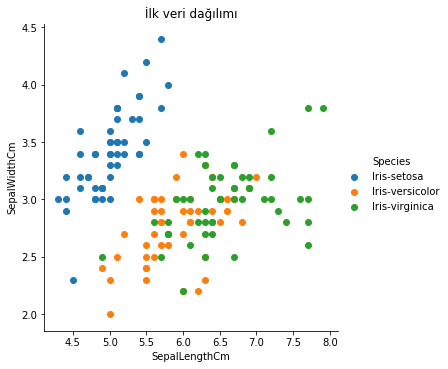

In [45]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.title("İlk veri dağılımı")
plt.show()

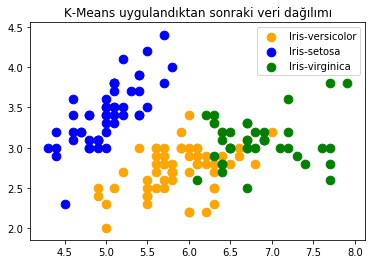

In [47]:
plt.scatter(data_kmeans[predict==0,0],data_kmeans[predict==0,1],color="orange",s=75,label="Iris-versicolor")
plt.scatter(data_kmeans[predict==1,0],data_kmeans[predict==1,1],color="b",s=75,label="Iris-setosa")
plt.scatter(data_kmeans[predict==2,0],data_kmeans[predict==2,1],color="g",s=75,label="Iris-virginica")
plt.title("K-Means uygulandıktan sonraki veri dağılımı")
plt.legend()
plt.show()